In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
prefixes = ['CC', 'CF', 'CR', 'CS', 'DP', 'ED', 'EF', 'EI', 'EM', 'MC', 'MD', 'MI', 'ML', 'MM', 'M_', 'ST']

In [3]:
# making dataframe
df1 = pd.read_csv("perf_microbench.csv")
X = df1["Benchmark"]
Y1 = df1["IPC"]
Y2 = df1["Cycles"]
Y3 = df1["Instructions"]
Y4 = df1["Seconds"]
Y5 = df1["IPS"]

df2 = pd.read_csv("gem5runs_microbench.csv")
X_2 = df2["Benchmark"]
Y1_2 = df2["IPC"]
Y2_2 = df2["Cycles"]
Y3_2 = df2["Instructions"]
Y4_2 = df2["Seconds"]
Y5_2 = df2["IPS"]

In [7]:
def absoluteplot(stat):
    plt.rcParams["figure.figsize"]=25,10
    data = {}
    data_sorted = {}
    i = 0
    j = 0
    label = stat

    # if stat == "Cycles" or stat == "Instructions":
    #     fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    #     fig.subplots_adjust(hspace=0.05)  # adjust space between axes

    for b, bench in enumerate(X):
        if stat == 'Cycles' or stat == 'Instructions':
            diff = ((df2[stat].iloc[b] - df1[stat].iloc[b]))/1000000
            label = 'Million ' + stat
        elif stat == 'IPS':
            diff = ((df2[stat].iloc[b] - df1[stat].iloc[b]))/1000000000
            label = 'B' + stat
        else:
            diff = (df2[stat].iloc[b] - df1[stat].iloc[b])
        data[bench] = diff
    
    keys = sorted(data, key=data.get)
    for r in keys:
        data_sorted[r] = [data[r]]

    # match a key from dictionary to an array of prefixes
    for k, v in data_sorted.items():
        for p in prefixes:
            if k.startswith(p[0]):
                data_sorted[k].append(prefixes.index(p))
    
    

    for b, bench in data_sorted.items():
        
        if data_sorted[b][0] > 10 or data_sorted[b][0] < -10:
            plt.annotate(str(round(data_sorted[b][0], 1)), (i,j), fontsize = 10)
            print(data_sorted[b][0])
            # annotate the value to the graph
        else:
            plt.bar(i, data_sorted[b][0], color="C" + str(data_sorted[b][1]))
        
        with open("microbench_seconds_diff.csv", "a") as csvfile:
            filewriter = csv.writer(
                csvfile, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL
            )
            filewriter.writerow([b, data_sorted[b][0]])
            csvfile.close()
        i = i + 1

    
    for i, pfrm in enumerate(prefixes):
        plt.bar(0, 0, color="C" + str(i), label=pfrm)
    
    plt.xticks((np.arange(len(data_sorted))), data_sorted, rotation=80, ha="center", fontsize=14)

    plt.xlabel("Benchmarks")
    plt.ylabel(label)
    plt.axhline(y=0)
    plt.title("Benchmark vs. " + label)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.show()

In [14]:
def percentageplot(stat):
    #plt.rcParams["figure.figsize"]=20,10
    data = {}
    data_sorted = {}
    i = 0
    j = 0

    for b, bench in enumerate(X):
        diff = (df2[stat].iloc[b] - df1[stat].iloc[b])/df1[stat].iloc[b]
        data[bench] = diff
    
    keys = sorted(data, key=data.get)
    for r in keys:
        data_sorted[r] = [data[r]]

    # match a key from dictionary to an array of prefixes
    for k, v in data_sorted.items():
        for p in prefixes:
            if k.startswith(p[0]):
                data_sorted[k].append(prefixes.index(p))
    
    

    for b, bench in data_sorted.items():
        plt.bar(i, data_sorted[b][0], 0.2, color="C" + str(data_sorted[b][1]))
        with open("microbench_seconds_diff.csv", "a") as csvfile:
            filewriter = csv.writer(
                csvfile, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL
            )
            filewriter.writerow([b, data_sorted[b][0]])
            csvfile.close()
        i = i + 1
    
    for i, pfrm in enumerate(prefixes):
        plt.bar(0, 0, color="C" + str(i), label=pfrm)
    
    plt.xticks((np.arange(len(data_sorted))), data_sorted, rotation=80, ha="center", fontsize=14)

    plt.xlabel("Benchmarks")
    plt.ylabel(stat)
    plt.axhline(y=0)
    plt.title("Benchmark vs. " + stat)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.show()

-59.764606
-55.316999
51.067017


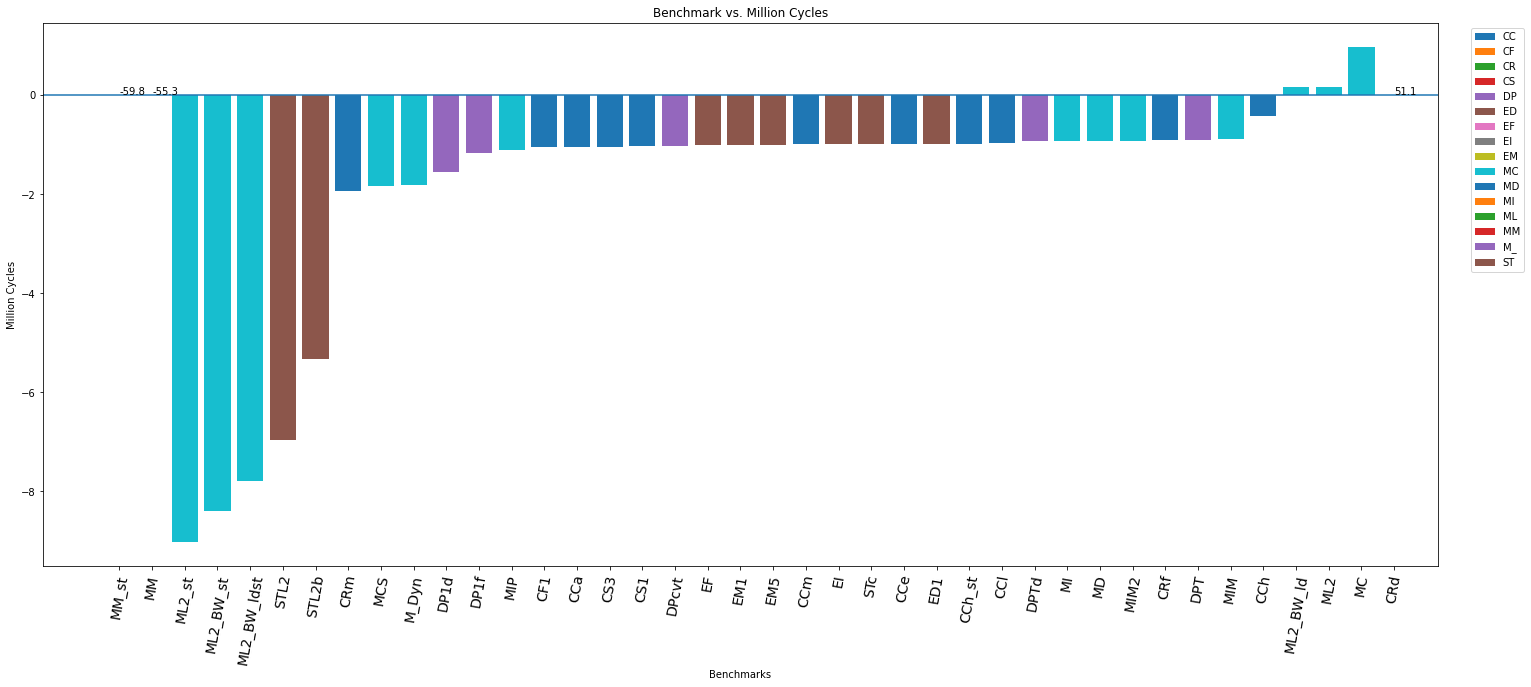

In [9]:
absoluteplot("Cycles")

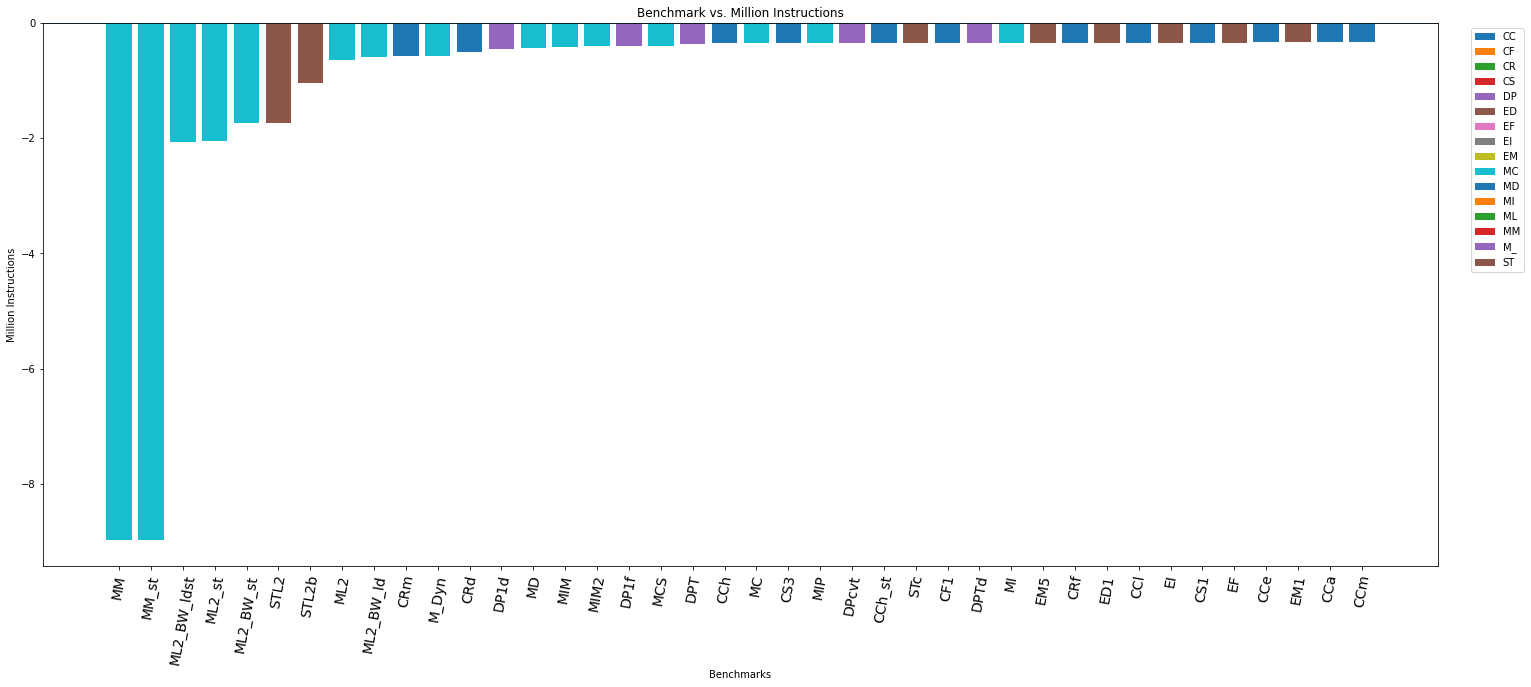

In [10]:
absoluteplot("Instructions")

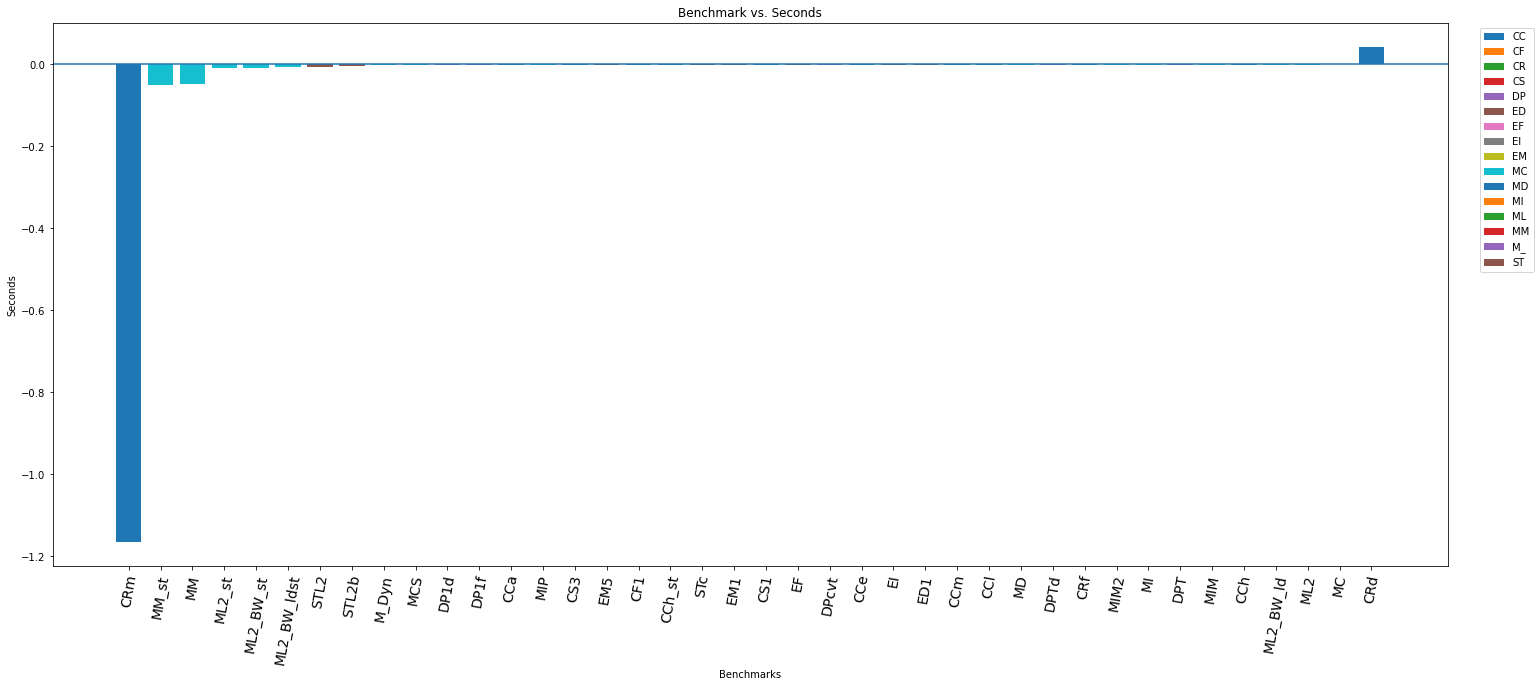

In [11]:
absoluteplot("Seconds")

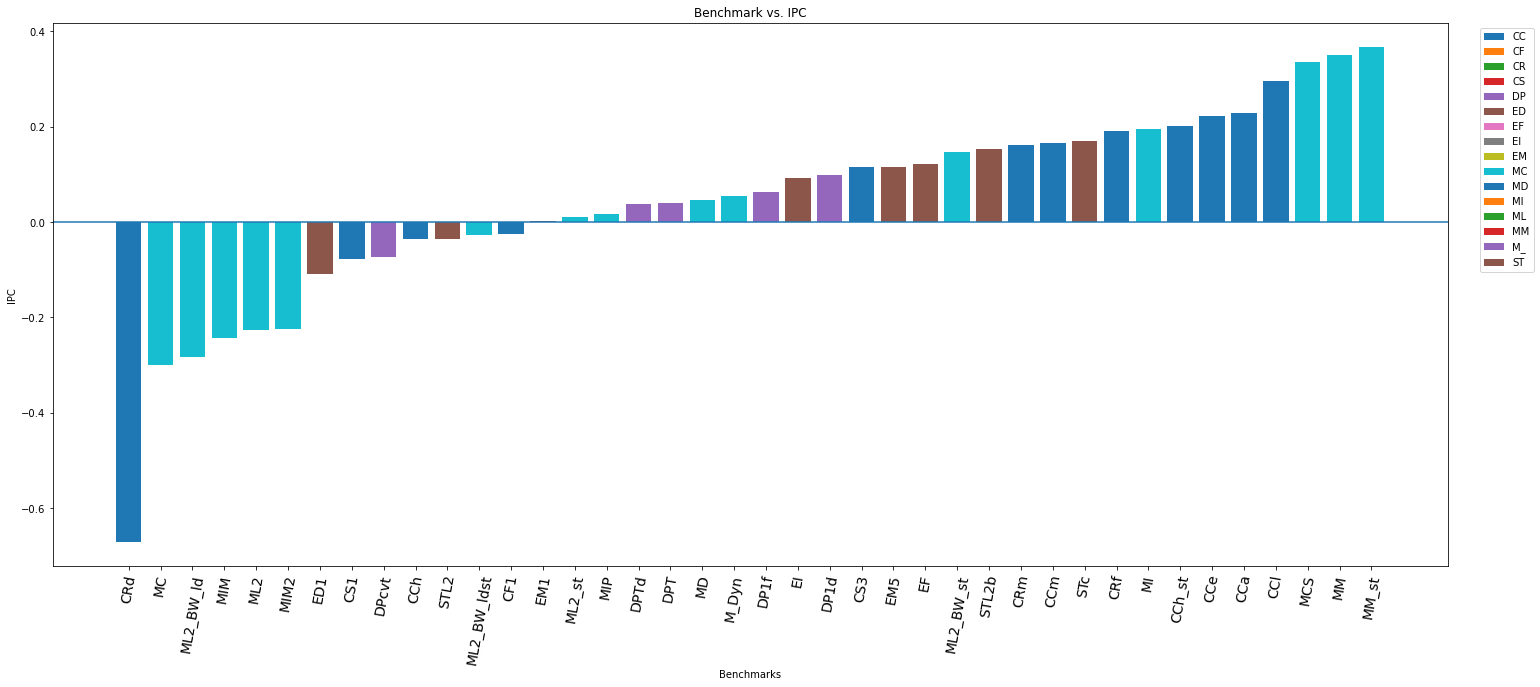

In [12]:
absoluteplot("IPC")

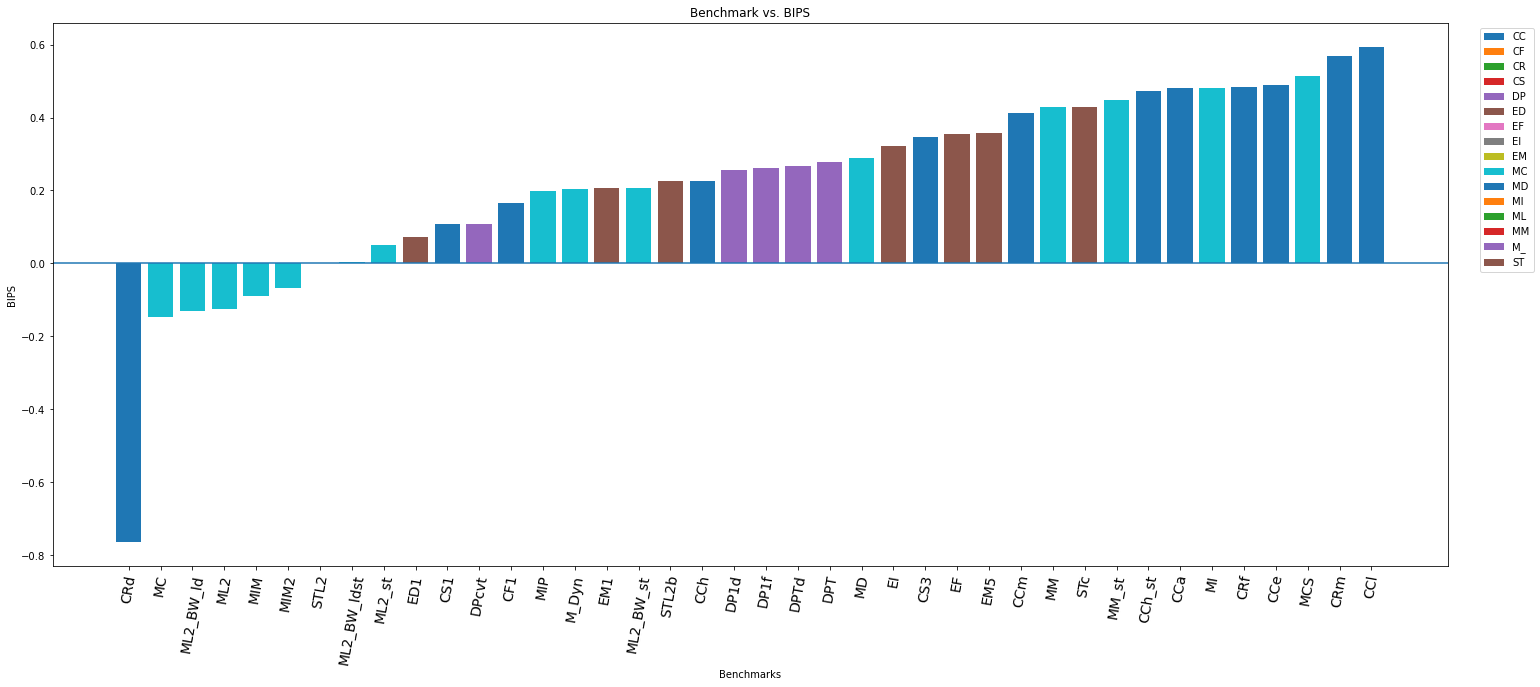

In [13]:
absoluteplot("IPS")

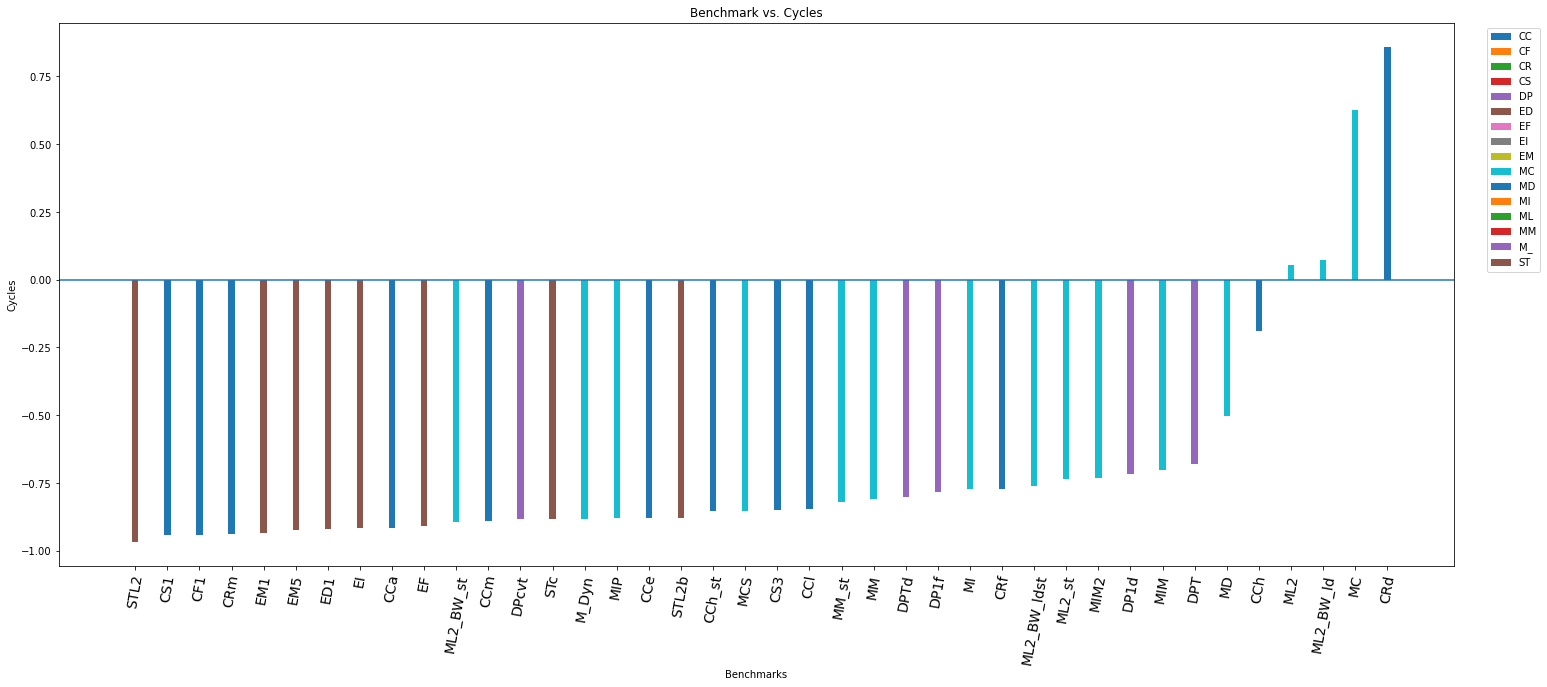

In [15]:
percentageplot("Cycles")

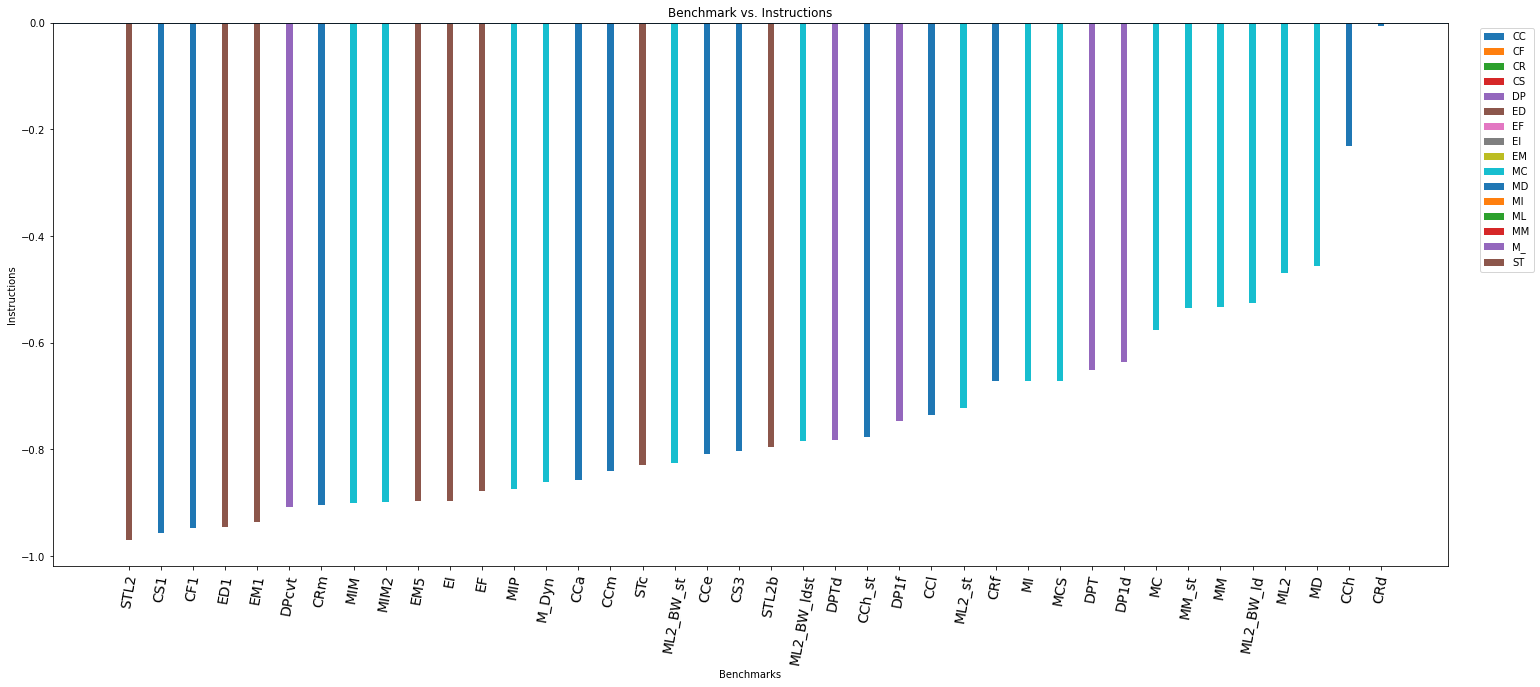

In [16]:
percentageplot("Instructions")

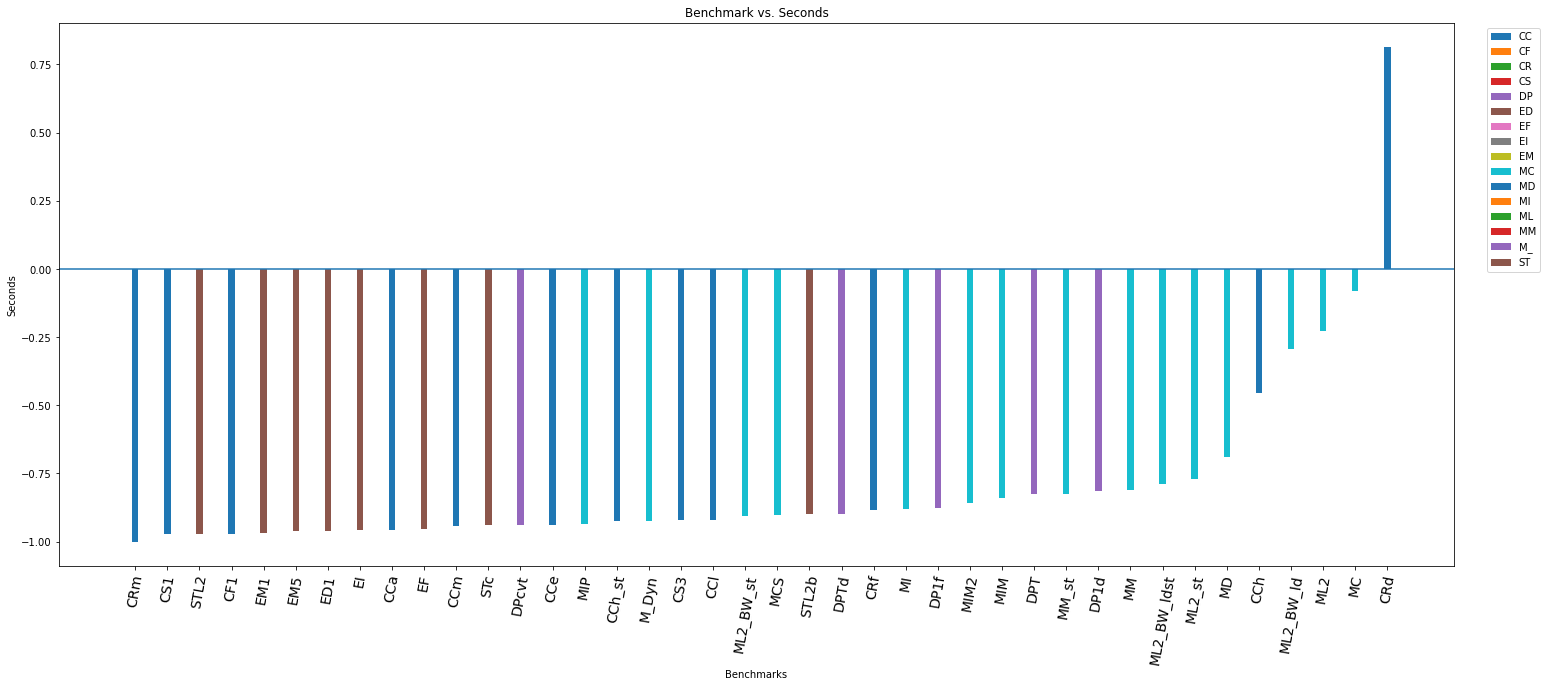

In [17]:
percentageplot("Seconds")

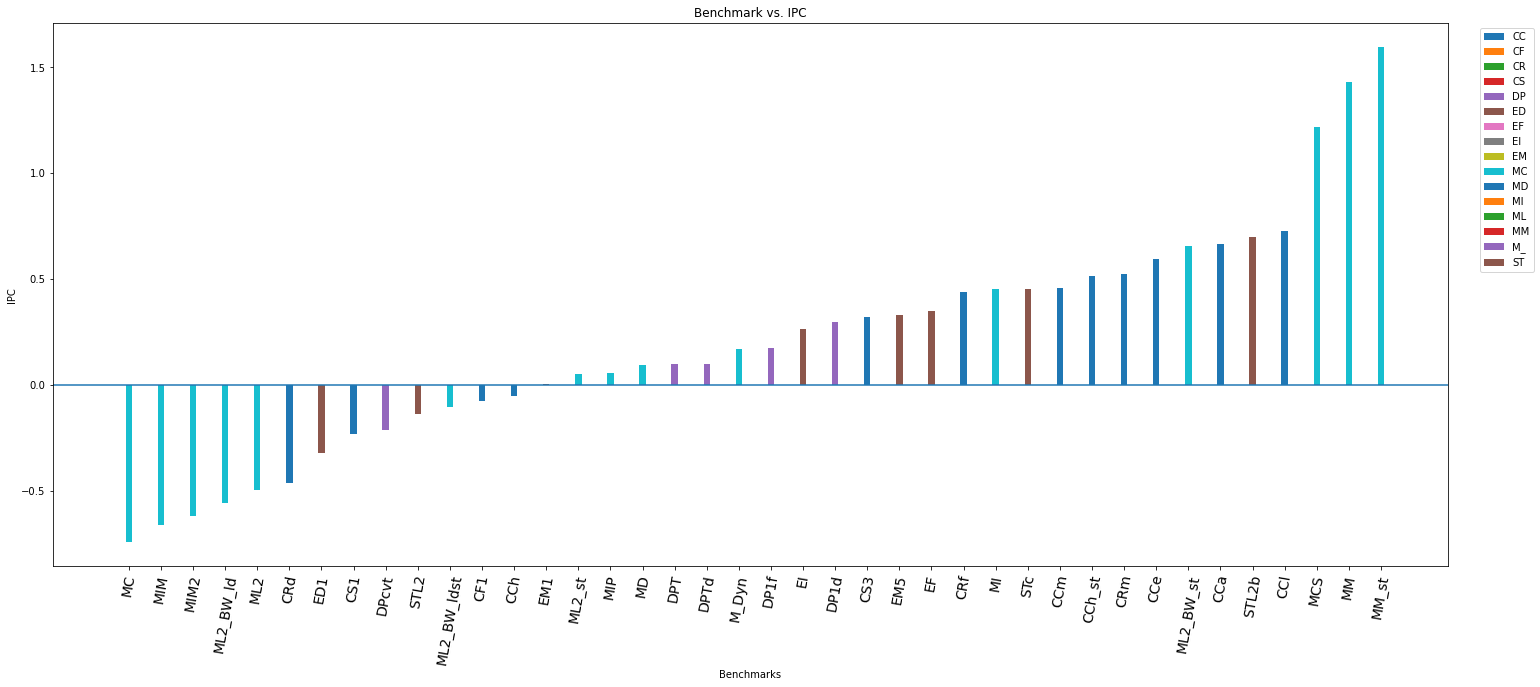

In [18]:
percentageplot("IPC")

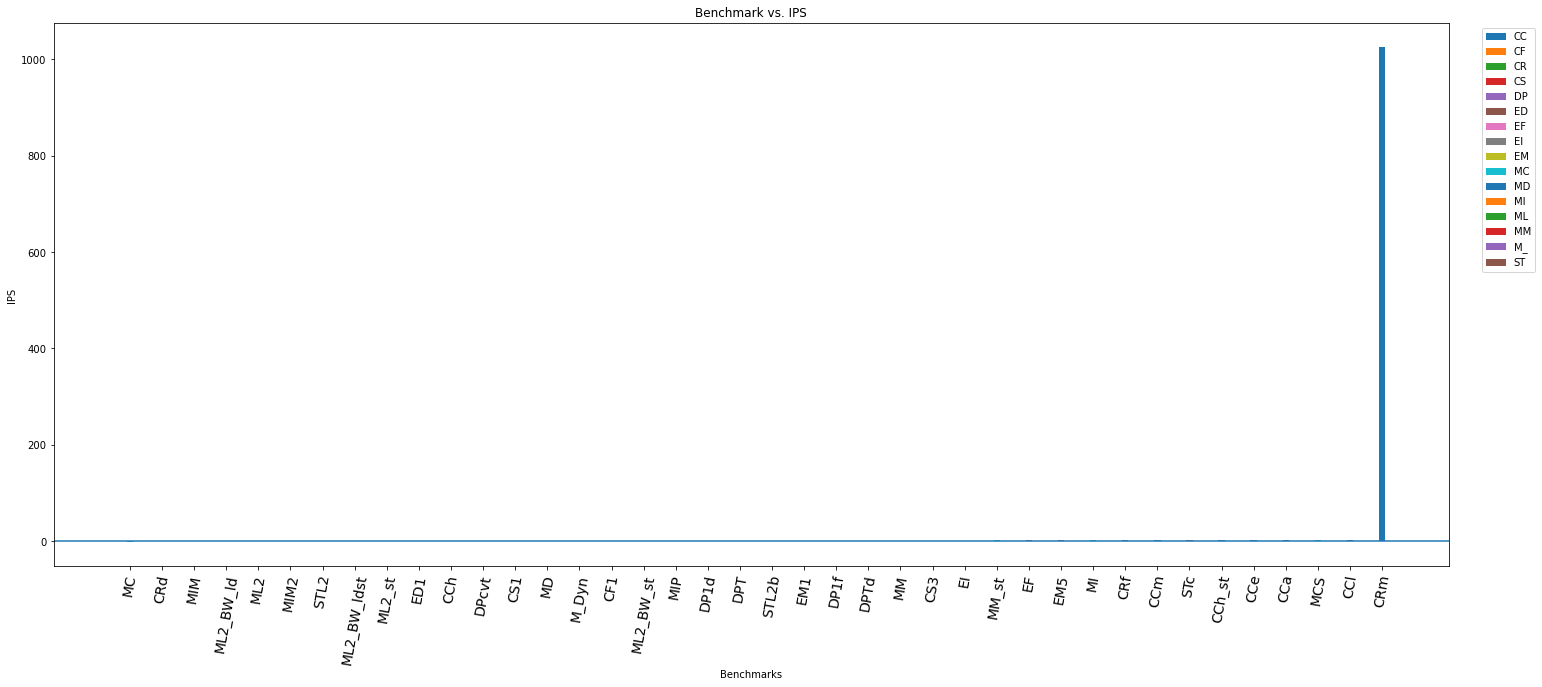

In [19]:
percentageplot("IPS")